### Projekt końcowy - Beata Świetlik

#### Część 1. Obróbka danych- Data Processing 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dictionary=pd.read_csv('LCDataDictionary.csv') 

In [ ]:
dictionary.head() 

In [ ]:
#plik ma wiele nulli więc usuwam kolumny bez danych
dictionary.drop(dictionary.columns[2:], inplace=True, axis=1)
dictionary

In [3]:
#otwarcie właściwego pliku
data=pd.read_csv('Loan_data.csv', header=1, low_memory=False)
pd.set_option('display.max_rows', None) 

In [ ]:
data.head()

In [ ]:
data.columns.tolist()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
#Czy mamy puste wartości? 
data.isnull().values.any()

In [ ]:
#sprawdzamy wartości w naszym targecie Loan Status
data.loan_status.unique() 

In [ ]:
#zobaczmy ile wierszy ma dany target
data['loan_status'].value_counts()

##### Czym jest Charged OFF? To tzw. odpis lub dług umorzony- oznacza to, że pożyczkobiorca nie spłacił swojego długu w terminie oraz mocno opóźnił lub całkowicie zaniechał spłaty .  Odzyskanie długu przez kredytodawcę uważane jest za mało prawdopodobne, zazwyczaj po 6 miesiącach od braku spłaty , taki dług uznaje sie za nieściągalny.  Taki dług w raportach kredytowych widnieje jako umorzony. Jeśli zdarzy się, że pożyczkobiorca spłaci dług po czasie, to jego status Charged Off nie zmieni się.  (W raportach kredytowych nie będzie widniał jako Fully Paid) 

#### status "does not meet the credit policy..." zamienię na Fully Paid lub Charged Off 

In [4]:
data['loan_status']=data['loan_status'].replace(('Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'),('Fully Paid', 'Charged Off'))

data['loan_status'].value_counts()

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64

In [ ]:
sns.countplot(data['loan_status'])

In [ ]:
#sprawdzę w których kolumnach brakuje wartości i jaka jest ilość nullli per kolumna
data.isna().sum()

##### z powyższego wynika, że dużo kolumn ma same Nulle, dlatego muszę je usunąć , bo są kompletnie nieprzydatne.  Na początek usuwam kolumny z brakującymi wartościami powyżej 35 tys. Kolumna ID nic nam nie wnosi do danych, dlatego ją tez usuwam. Usunę też kolumnę mths_since_last_delinq, ponieważ zawiera ponad 50% brakujących wartości. 

In [ ]:
#W kilkunastu kolumnach brakuje po 3 wartości, prawdopodobnie 3 wiersze są nieuzupełnione dla każdej z kolumn i chce je usunąć 
column = 'loan_amnt'
data[data[column].isna()]

In [5]:
#usuwam 3 wiersze, w których nie ma uzupełnionych wartości
data.drop([data.index[42537], data.index[42536], data.index[39786]],  axis=0, inplace=True)

In [6]:
data.drop(['id', 'member_id', 'zip_code', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'], axis=1, inplace=True)
data.drop(['tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util'], axis=1, inplace=True)
data.drop(['open_rv_12m','open_rv_24m' , 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi','total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal'], axis=1, inplace=True)
data.drop(['bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc'], axis=1, inplace=True)
data.drop(['mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats'],axis=1, inplace=True)
data.drop(['num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m'], axis=1, inplace=True)
data.drop(['pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high'],axis=1, inplace=True)
data.drop(['sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths'], axis=1, inplace=True)
data.drop(['sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date'],axis=1, inplace=True)
data.drop(['hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount'], axis=1, inplace=True)
data.drop(['debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'mths_since_last_delinq'], axis=1, inplace=True)
data.shape

(42535, 58)

In [ ]:
#zobaczmy jak teraz prezentują się kolumny i ilość danych 
data.isna().sum()

### uzupełnianie brakujacych danych w kolumnach . 

###### 1. emp_title czyli wykonywany zawód - poniżej na przykładach widać, że te zawody są mocno zróżnicowane, wpisywane ogólnie, są podawane nazwy firm. Ta kolumna nic nie wnosi do naszej analizy, także chcę ją usunąć 

In [ ]:
data[['emp_title']].head(20)

In [7]:
data.drop(['emp_title'], axis=1, inplace=True)

###### 2. emp_length czyli długość zatrudnienia w latach. W tabeli mamy zakres od 0 do 10, gdzie 0 to zatrudnienie poniżej roku a 10 to zatrudnienie 10 lat i więcej. Mamy ponad 1000 wartości brakujących. Najrozsądniej uzupełnić brakujące wartości dominantą, czyli wpisać zatrudnienie powyżej 10 lat

In [ ]:
data['emp_length'].value_counts()

In [8]:
data.fillna({'emp_length': '10+ years'}, inplace=True)

In [9]:
#długość zatrudnienia konwertuję do int
data['emp_length']=data['emp_length'].str.strip('+ years<').astype(int)

###### 3. annual_inc czyli roczny dochód . Brakuje tylko 4 wartości.  Uzupełnie je medianą .

In [ ]:
data[['annual_inc']].describe()

In [10]:
data.annual_inc.fillna(data.annual_inc.median(), inplace=True)

##### 4. desc czyli opis celu pożyczki.  Brakuje ponad 13 tys. danych na ten temat.  Poniżej widać, że jest to kolumna typowo opisowa. Niekoniecznie przedstawiony cel pożyczki jest rzeczywisty. Ten opis nie wnosi nic do analizy danych. Kolumna jest do usunięcia. 

In [ ]:
data[['desc']].head(10)

In [11]:
data.drop(['desc'], axis=1, inplace=True)

##### 5. title- podobnie jak w kolumnie desc- mamy opis pożyczkobiorcy dotyczący celu pożyczki, ale jest tego bardzo dużo i raczej nic nam to nie wniesie do analizy. Lepiej przyjrzeć się kolumnie purpose. KOlumna title jet do usunięcia 

In [ ]:
data['title'].value_counts()

In [12]:
data.drop(['title'], axis=1, inplace=True)

##### 6. delinq_2yrs - to liczba przypadków przeterminowania spłaty o 30 dni wpisana do historii kredytowej z  ostatnich dwóch lat .  Poniżej widać, że  ponad 90% pożyczkobiorców nie miało przypadków przeterminowania spłaty .  P analizie  jaki loan_status ma te 29 brakujących rekordów (prawie wszyscy mają spłaconą pożyczkę) ustalam podejście większościowe i brkaujące rekordy uzupełniam wartością 0. 

In [ ]:
data['delinq_2yrs'].value_counts()

In [13]:
print(data[data.delinq_2yrs.isnull()]['loan_status'])

42450     Fully Paid
42451     Fully Paid
42460     Fully Paid
42473     Fully Paid
42481     Fully Paid
42484     Fully Paid
42495     Fully Paid
42510     Fully Paid
42515     Fully Paid
42516     Fully Paid
42517     Fully Paid
42518     Fully Paid
42519     Fully Paid
42520     Fully Paid
42521     Fully Paid
42522    Charged Off
42523     Fully Paid
42524     Fully Paid
42525    Charged Off
42526     Fully Paid
42527     Fully Paid
42528     Fully Paid
42529     Fully Paid
42530    Charged Off
42531     Fully Paid
42532     Fully Paid
42533     Fully Paid
42534     Fully Paid
42535     Fully Paid
Name: loan_status, dtype: object


In [14]:
data.fillna({'delinq_2yrs': 0}, inplace=True)

##### 7. earliest_cr_line- to miesiąc i rok, kiedy pożyczkobiorca wziął swoją 1 pożyczkę.  Brakuje tyle samo wartości co w przypadku kolumny delinq_2yrs.  Moim zdaniem to dosyć istotne dane, które dużo mówią o potencjalnym pożyczkobiorcy i tworzą historię kredytową. Puste wartości uzupełnie wartością mediany. 

In [ ]:
data[['earliest_cr_line']].head(5) 

In [15]:
#muszę skonwertować datę 
data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')  

In [ ]:
data[['earliest_cr_line']].head(5) 

In [16]:
data.earliest_cr_line.fillna(data.earliest_cr_line.mean(), inplace=True)

###### 8. inq_last_6mths- liczba zapytań o kredy w ciągu ostatnich  miesięcy. Brakuje 29 wartości. POniżej wynika , że zdecydowana większość miała 0 lub 1 zapytanie. Zastosuje podejście większościowe i uzupełnie brakujące dane dominantą. 

In [ ]:
data['inq_last_6mths'].value_counts()

In [17]:
data['inq_last_6mths'].fillna(data['inq_last_6mths'].mode()[0], inplace=True)

###### 9. open_acc to liczba otwartych linii kredytowych. Znów brakuje 29 wartości. Tu wartości są mocno zróżnicowane. Wielu klientów konsoliduje kredyty i to całkiem dużo różnych kredytów. Najbezpieczniej do uzupełnienia nulli jest przyjąć wartość środkową. 

In [ ]:
data['open_acc'].value_counts()

In [ ]:
data['open_acc'].describe()

In [17]:
data['open_acc'].fillna(data['open_acc'].median(), inplace=True)

###### 10. pub_rec ta kolumna mówi o liczbie rejestrów , gdzie wpisuje się nierzetelnych klientów. Podobnie jak we wcześniejszym przypakdu brakuje 29 wartości.  Ponad 40 tys. pożyczkobiorców nie jest nigdzie wpisanych. Puste wartości uzupełnie dominantą. 

In [ ]:
data['pub_rec'].value_counts()

In [18]:
data['pub_rec'].fillna(data['pub_rec'].mode()[0], inplace=True)

###### 11. revol_util - stopa procentowa wykorzystania linii kredytowej.  Im mniejsza stopa procentowa tym mniej jest kwoty do spłacenia .  Wartości są tak mocno zróżnicowane, że najlepiej nulle uzupełnić wartością mediany.  Muszę tylko przekonwertować str do int. 

In [ ]:
data['revol_util'].value_counts()

In [19]:
#konwertowanie str na int 
data['revol_util']= data['revol_util'].str.strip('%').astype(float)

In [20]:
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)

###### 12. total_acc-  całkowita liczba linii kredytowych, znów brakuje 29 wartości. Wartość uzupełnie medianą. 

In [ ]:
data['total_acc'].describe()

In [21]:
data['total_acc'].fillna(data['total_acc'].median(), inplace=True)

###### 13. last_pymnt_d - miesiąc kiedy otrzymano ostatnią płatność.  Przy okazji sprawdzę kolumny total_pymnt (Płatności otrzymane do tej pory w łącznej kwocie sfinansowanej) , total_pymnt_inv i last_pymnt_amnt (ostatnia otrzymana łaczna kwota płatności). KOlumny prezentują nieistotne dane z ogromnym rozstrzałem wartości. Nic nie wnoszą do analizy dlatego usuwam te 4 kolumny

In [ ]:
data['last_pymnt_d'].value_counts()

In [ ]:
data['last_pymnt_amnt'].value_counts()

In [ ]:
data[['total_pymnt', 'total_pymnt_inv']].head(10) #widac że te kolumny prezentują prawie te same dane. 

In [22]:
data.drop(['total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'last_pymnt_d'], axis=1, inplace=True)

##### 14. last_credit_pull_d- 4 brakujące wartości - ostatni miesiąc, kiedy Lending Club zaciągnęło kredyt na pożyczkę....według mnie są to  nieistotne dane -  do usunięcia. 

In [ ]:
data[['last_credit_pull_d']].head(5)

In [23]:
data.drop(['last_credit_pull_d'], axis=1, inplace=True)

##### 15. collections_12_mths_ex_med  i chargeoff_within_12_mths- 145 brakujących wartości , reszta to 0. kolumna do usunięcia. 

In [ ]:
data['collections_12_mths_ex_med'].value_counts()

In [ ]:
data['chargeoff_within_12_mths'].value_counts()

In [24]:
data.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths'], axis=1, inplace=True)

###### 16. acc_now_delinq  i delinq_amnt- 29 brakujacych wartości-  to liczba rachunków, na których kredytobiorca ma teraz zaległości płatnicze oraz kwota zalgłości. Jak widać prawie  wszyscy nie mają zaległości  i dlatego nie ma kwoty, więc kolumna nic nie wnosi do analizy. Do usunięcia

In [ ]:
data['acc_now_delinq'].value_counts()

In [ ]:
data['delinq_amnt'].value_counts()

In [25]:
data.drop(['acc_now_delinq', 'delinq_amnt'], axis=1, inplace=True)

##### 17. pub_rec_bankruptcies - to liczba bankructw notowanych publicznie. To może mieć duży wpływ na uzyskanie i spłątę kredytu w przyszłosci. Uzupełnię brakujące wartości dominantą czyli liczbą 0. 

In [ ]:
data['pub_rec_bankruptcies'].value_counts()

In [26]:
data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0], inplace=True)

###### 18. tax_liens- liczba zastawów podatkowych. Tylko jedna osoba posiada taki zastaw. Raczej ta wartość nie ma wpływu na pożyczkobiorcę i jego spłatę. Kolumna jest do usunięcia

In [ ]:
data['tax_liens'].value_counts()

In [27]:
data.drop(['tax_liens'], axis=1, inplace=True)

### analiza przydatności innych kolumn, które posiadały uzupełnione wartości 
######  19. purpose - to kategoria podana przez pożyczkobiorcę przy składaniu wniosku. Tutaj już dane są bardziej pogrupowane. Prawdopodobnie pożyczkobiorca wybierał kategorię z listy rozwijanej. 

In [ ]:
data['purpose'].value_counts()

###### 20. initial_list_status wartości to same f, out_prncp  wartości to same 0, out_prncp_inv wartości to same 0. Kolumny do usunięcia

In [ ]:
data['initial_list_status'].value_counts()

In [ ]:
data['out_prncp'].value_counts()

In [ ]:
data['out_prncp_inv'].value_counts()

In [28]:
data.drop(['initial_list_status', 'out_prncp','out_prncp_inv' ], axis=1, inplace=True)

##### 21. policy_code, application_type (czy wniosek jest indywidualny czy nie- nie wpływa na spłatę pożyczki i pożyczkobiorcę), hardship_flag (czy pożyczkobiorca jest objęty planem trudności- może nie być objęty takim planem a jednak nie spłaci pożyczki ) , disbursement_method (w jaki sposób otrzyma pożyczkę- nie wpływa to na spłatę pożyczki) , debt_settlement_flag (Oznaczenia wskazujące, czy pożyczkobiorca, który dokonał spłaty, współpracuje z firmą zajmującą się rozliczaniem długów. Kolumny do usunięcia. 

In [ ]:
data['policy_code'].value_counts()

In [ ]:
data['application_type'].value_counts()

In [ ]:
data['hardship_flag'].value_counts()

In [ ]:
data['disbursement_method'].value_counts()

In [ ]:
data['debt_settlement_flag'].value_counts()

In [29]:
data.drop(['policy_code', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag'], axis=1, inplace=True)

##### 22. int_rate- jest wyrażone w procentach. Konwertuje to do float

In [30]:
data['int_rate'] = data['int_rate'].str.strip('%').astype(float)

##### 23. zmienne url,  pymnt_plan . URL to adres strony, nic nie wnosi - jest do usunięcia. Pymnt_plan ma jedną wartość w każdym wierszy czyli n. też do usunięcia. 

In [ ]:
data['pymnt_plan'].value_counts()

In [31]:
data.drop(['url', 'pymnt_plan'], axis=1, inplace=True)

###### 24. recoveries- kolumna do usunięcia.

In [32]:
data.drop(['recoveries'], axis=1, inplace=True)

##### KOŃCOWA ILOŚĆ KOLUMN PO 1 CZĘŚCI

In [ ]:
data.isna().sum()

In [ ]:
data.shape

## 2. EDA- Eksploracja Danych

##### Zacznę od przedstawienia heatmapy , aby zobaczyć, które atrybuty są najmocniej, a które najmniej skorelowane z naszym targetem, czyli z Loan_status. Loan satus zamienię na zmienną numeryczną. Fully Paid przypisze do 0 a Charged off do 1. 

In [33]:
from scipy import stats

In [34]:
data['loan_status'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})

In [ ]:
corr = data.corr() 
corr

In [ ]:
import seaborn as sns 
plt.figure(figsize=(20,12))
sns.heatmap(abs(corr), 
         xticklabels=corr.columns, 
         yticklabels=corr.columns, cmap='Blues',annot=True)

Z wykresu korelacji  widać największe powiązania z :
 - loan_amnt, funded_amnt i funded_amnt_inv- czyli kwoty pożyczki wnioskowane i udzielone 
 - loan/funded_amnt i total_rec_prncp oraz total_rec_int- funded_amnt i total_rec_prncp powinno być takie same dla
 pożyczek spłaconych, a mniejsze total_rec_prnncp jest dla niespłaconych
-installment i total_rec_prncp/total_rec_int
-installment i loan_amnt
-loan_status i last_fico
    
Tam gdzie jest ujemna korelacja, powiązania też są mocne ale działają na niekorzyść:
 - int_rate i last_fico
 - revol_util i fico

##### Analiza installment czyli raty a total_rec_prncp czyli ilości spłaconego kredytu. 

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot( x='installment', y='total_rec_prncp', data=data, marker='*', hue='loan_status')
plt.xlabel("Rata kredytu", fontsize=15)
plt.ylabel('Spłacona kwota pożyczki ', fontsize=15)
plt.title("Rata vs spłacona kwota", fontsize=17)

Wniosek: Im wyższa kwota spłaconej pożyczki tym była wyższa rata. Widać tu mocną zależnośc liniową pomiędzy tymi zmiennymi. Widać, że byli klientci, którzy prawdopodobnie mieli wysokie pożyczki (bo rata była wysoka) a zapłacili ich raptem kilka lub wcale. Na wykresie widać  też punkty, gdzie prawdopodobnie pożyczkobiorca był bliski spłaty kredytu, ale finalnie uzyskał status Charged Off. 

###### Analiza loan_amnt i funded_amnt

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter( 'loan_amnt', 'funded_amnt', data=data, marker='o', color='mediumvioletred')
plt.xlabel("Wnioskowana kwota pożyczki", fontsize=15)
plt.ylabel('Przyznana kwota pożyczki', fontsize=15)
plt.title("Przyznana vs wnioskowana kwota pożyczki", fontsize=17)

Wniosek: Z reguły wartości pożyczki przyznane są mniejsze od tych o które wnioskuje pożyczkobiorca. Nie zdarza się, że firma udziela pożyczek większych niż kwota wnioskowana. Na wykresie widac ciekawą grupę osób, która wnioskowała o kwoty  20-25 tysięcy a dostała kredyt o połowę niższy. Zobaczę jak wyglądają dane w tej "ciekawej" grupie.

In [ ]:
data[(data.loan_amnt >20000) & (data.loan_amnt< 25000)& (data.funded_amnt<15000)]

###### Ważnym elementem w jakiejkolwiek pożyczce jest jej oprocentowanie. Zobaczmy jak int_rate ma się z wynikiem last_fico_range_high

In [ ]:
data['int_rate'].describe()

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.regplot(data=data, x='last_fico_range_high', y='int_rate', marker='*')
plt.xlim(500,900)
plt.xlabel("Ostatni wynik FICO", fontsize=15)
plt.ylabel('Oprocentowanie pożyczki', fontsize=15)

Wniosek: Im wyższe FICO tym mniejsze oprocentowanie. Jednak z rozkładu danych bardziej wynika , że nie ma związku oprocentowania pożyczki z ostatnim wynikiem Fico. 

##### Zobaczmy jak wysokość oprocentowania int_rate ma się do lat pracy.

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=sns.boxplot(data=data, x='emp_length', y='int_rate')
plt.xlabel("Długość zatrudnienia w latach", fontsize=15)
plt.ylabel('Oprocentowanie', fontsize=15)
plt.title("Zależność oprocentowania od stażu pracy", fontsize=17)

Wniosek: z wykresu wynika, że mediana oprocentowania w każdym przypadku wynosi ok 12,5%.  Ciut niższa mediana jest dla osób pracująych od 8 lat wzwyż i te osoby mają większą szansę na oprocentowanie niższe niż 10%.   Wynika to z bardziej ustabilizowanej sytuacji zawodowej i finansowej. 

##### W danych mamy atrybut Grade - czyli wewnętrzne oznaczenie pożyczkobiorcy .  Grade A jest najlepszy, grade G najgorszy. Zobaczmy jak Grade wpływa na wysokość oprocentowania int_rate

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.violinplot(x='grade', y='int_rate', data=data)
plt.xlabel("Grade", fontsize=13)
plt.ylabel('Oprocentowanie', fontsize=13)
plt.title("wysokość oprocentowania vs. grade", fontsize=15)

Wniosek: najniższe oprocentowanie mają osoby z grade A oraz B. Pożyczkobiorcy z najlepszym grade mają oprocentowanie nieprzekraczające 10% , średnio 7,5%. Osoby z grade G mają orpcentowanie 15-25%, średnio 20%. Spróbuję prześledzić czy Grade zależy od ogólnej długości historii kredytowej

In [35]:
data['earliest_cr_line']= pd.DatetimeIndex(data['earliest_cr_line']).year

In [ ]:

fig=plt.figure(figsize=(12,8))
sns.violinplot(x='grade', y='earliest_cr_line', data=data)
plt.xlabel("Grade", fontsize=13)
plt.ylabel('Wiek kredytowy', fontsize=13)
plt.title("wiek kredytowy vs. grade", fontsize=15)

Wniosek: Osoby z Grade A, B oraz D mają najdłuższą historię kredytową. Osoby z niskim grade F i G później zaczęły brać pierwsze pożyczki. Poniekąd wiek kredytowy może mieć znaczennnie w przyznawaniu wyższego stopnia Grade.

##### Zobaczę jak rozkłada się status posiadania domu w stosunku do przyznanego Grade.

In [ ]:
data['grade'].value_counts()

In [ ]:
data_grade_home=pd.crosstab(data['grade'], data['home_ownership'])
print(data_grade_home)

##### - Spróbuję wykonać test Chi_Kwadrat, aby sprawdzić czy:
- H0- hipoteza zerowa- Nie ma zależności pomiędzy statusem mieszkania a stopniem GRADE
- H1- hipoteza alternatywna- Są znaczące relacje między zmiennymi

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
stat,p_value,dof, expected=chi2_contingency(data_grade_home)
alpha=0.05
print(p_value)

In [ ]:
if p_value<=alpha:
    print('Odrzucamy hipotezę 0- są znaczące relacje między zmienną grade a statusem domu')
else:
    print('Akceptujemy hipotezę 0- brak zależności')

##### Ciekawi mnie jak prezentuje się zależność celu pożyczki w stosunku do wnioskowanej kwoty pożyczki. Przeanalizują purpose i loan_amnt

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=sns.boxplot(data=data, x='loan_amnt', y='purpose')
plt.xlabel("Wnioskowana wysokość pożyczki", fontsize=15)
plt.ylabel('Cel pożyczki', fontsize=15)
plt.title("cel pożyczki vs. wnioskowana kwota", fontsize=17)

Wniosek: Największe pożyczki są przyznawane na rozwój małej przedsiębiorczści, spłatę kardy kredytowej , dom i konsolidację. Najmniejsze kwoty są wnioskowane o samochód, przeprowadzkę i wakacje. 

##### A) W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

FICO RATING to trzycyfrowa liczba, która pomaga pożyczkodawcom określić jakie jest prawdopodobieństwo spłaty pożyczki. To z kolei wpływa na to, ile możesz pożyczyć, ile miesięcy masz do spłacenia, a ile to będzie kosztowało (wysokość oprocentowania).
Można patrzeć na FICO Score jako podsumowaniu raportu kredytowego. Mierzy, jak długo i ile pożyczkobiorca ma kredytu, jaka część dostępnego kredytu jest wykorzystywana i czy spłaca go w terminie.

Mamy 2 atrybuty- fico range low i fico range high. Zrobię z nich jedną kolumnę fico_range_mean, ponieważ kolumny zkaresu dolnego i górnego mają prawie takie same wartości i są skorelowane na 1. KOlumny fico range low i fico range high, a ja będę do analizy używać fico_range_mean

In [ ]:
data[['fico_range_low', 'fico_range_high']].head(5)

In [ ]:
data[['fico_range_low', 'fico_range_high']].corr()

In [36]:
data['fico_range_mean']=(data.fico_range_low + data.fico_range_high)/2

In [ ]:
data[['fico_range_mean']].head(5)

In [37]:
data.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)

#####  Mamy 5  zakresów Fico. Zobaczmy jak wyglądają statystyki dla tych klientów.

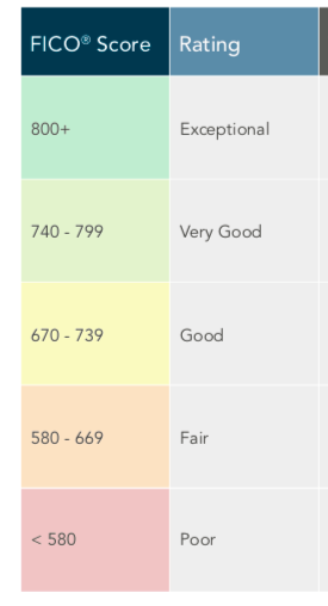

In [ ]:
data['fico_range_mean'].describe()

Z racji, że za liczbą FICO Score kryje się Rating , to stworzę kolumnę z opisem, czy dany pożyczkobiorca jest Very Good, Good,  itp...

In [38]:
def add_rating(row):
    if row['fico_range_mean']<580:
        return 'Poor'
    if row['fico_range_mean']< 670:
        return 'Fair'
    if row['fico_range_mean']<740:
        return 'Good'
    if row['fico_range_mean']<800:
        return 'Very Good'
    if row ['fico_range_mean']>=800:
        return 'Exceptional'
    
data['fico_rating']=data.apply(add_rating, axis=1)


In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='fico_rating', hue = 'loan_status', palette= 'pastel')
plt.xlabel('Fico Rating')
plt.legend( loc='upper right', labels=['Charged Off', 'Fully Paid'])
plt.title('fico vs. status')


In [ ]:
fig=plt.figure(figsize=(12,8))
ax=sns.boxplot(data=data, x='loan_status', y='fico_range_mean')
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('FICO SCORE', fontsize=15)
plt.title("Zależność spłacalności od wartości FICO", fontsize=17)

In [ ]:
data.fico_range_mean.corr(data.loan_status)

Wniosek: Wynik Fico jest bardzo słabo skorelowany ze statusem spłaty pożyczki. Jeśli biorąc pod uwagę fakt korelacji, to ten czynnik kompletnie nie ma związku czy ktoś spłaci pożyczkę czy nie. I to dobrze widać na boxplocie, gdzie mamy kilka odstających wartości Fico z wysokimi wartościami powyżej 800 (gdzie teoretycznie jest to bardzo dobry pożyczkobiorca), a pożyczka nie została spłacona. Oczywiście w przeważającej większości, ci pożyczkobiorcy z ratingiem Exceptional mają te pożyczki spłacone. Z wykresów wynika, że najwięcej jest pożyczkobiorców z ratingiem Good i very Good. Najwięcej niespłaconych pożyczek jest u pożyczkobiorców z ratingiem Good i Fair .  Najniższy Fico jaki miał pożyczkobiorca wynosił 612, a pożyczka została spłacona. Według mnie nie można mówić , że wysokie Fico daje nam tylko szanse, ale jest różnoznacze z tym, że pożyczkobiorca spłaci swój kredyt. 

##### Wykonam test Chi_Square

- H0- Zmienne są niezależne
- H1- Zmienne nie są niezależne. 

In [ ]:
data_fico_loan=pd.crosstab(data['fico_rating'], data['loan_status'])
print(data_fico_loan)

In [ ]:

from scipy import stats
from scipy.stats import chi2_contingency
stat,p,dof, expected=chi2_contingency(data_fico_loan)
print('dof=%d' % dof)
print(expected)
alpha=1.0
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Odrzucamy Hipoteze 0- zmienne są między sobą zależne')
else:
    print('Przjmujemy Hipotezę 0- zmienne są niezależne')

<!-- Wniosek spróbuję podeprzeć testem Chi-Square
H0- hipoteza zerowa- "Nie ma zależności pomiędzy Ratingiem a spłatą pożyczki"
H1- hipoteza alternatywna "Są zależności między zmiennymi" -->

#### B)	W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO? Będę analizować kolumny earliest_cr_line vs. loan_status oraz dodatkowo fico_rating

Text(0.5, 1.0, 'Zależność spłacalności od wieku kredytowego')

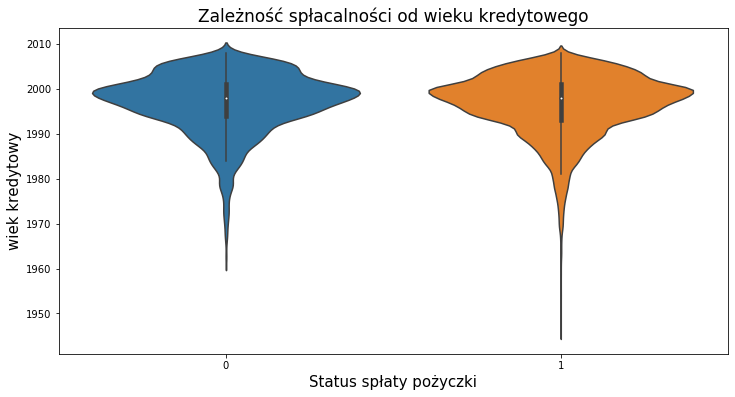

In [39]:
fig=plt.figure(figsize=(12,6))
sns.violinplot(data=data, x="loan_status", y="earliest_cr_line")
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('wiek kredytowy', fontsize=15)
plt.title("Zależność spłacalności od wieku kredytowego", fontsize=17)

In [40]:
data[['fico_range_mean', 'loan_status', 'earliest_cr_line']].corr()

,fico_range_mean,loan_status,earliest_cr_line
fico_range_mean,1.000000,0.141917,-0.235063
loan_status,0.141917,1.000000,-0.019933
earliest_cr_line,-0.235063,-0.019933,1.000000


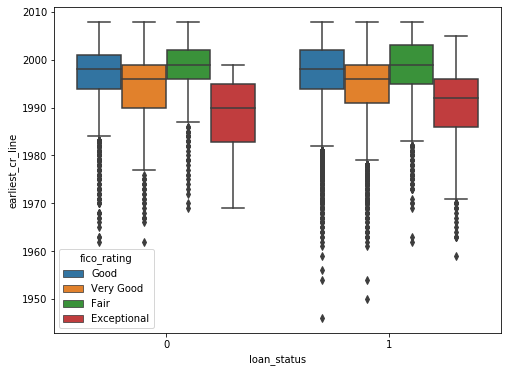

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='loan_status', y='earliest_cr_line', hue="fico_rating")

Wniosek: Z wyników korelacji ujemnej wynika, że wiek kredytowy nie ma wpływu ani na spłatę pożyczki, ani na wynik Fico.  I pomimo pobrego wyniku Fico oraz wcześnie rzpoczętej historii kredytowej,mamy przypadki, że pożyczka nie została spłacona. 
Z wykresu wiolinowego wynika, że od roku 1990 zaczęła wzrastać ilość branych pożyczek i zaczęła spadać po roku 2000. Wtedy największa ilość pożyczkobiorców rozpoczęła swoją przygodę ze spłacaniem kredytów. Może to wynikać z np. dobrymi warunkami kredytowymi, z tanimi nieruchomościami. Ludzie brali wtedy po kilka kredytów na raz i je konsolidowali. Wiek kredytowy można poniekąd połączyć większym wiekiem pożyczkobiorcy, a to nie wpływało na spłatę pożyczki. Najstarsza osoba rozpoczęła swoją przygodę z kredytami w 1946 roku , a kredyt zaciągnięty w LC został spłacony. Ci najstarsi pożyczkobbiorcy spłacali swoje kredyty. 
Co do związku Fico z wiekiem kredytowym, mogę stwierdzić, że dawniej  ( w latach 70-tych) pożyczki dostawały osoby które miały najlepszy wynik Fico.  Z boxplotów wynika, że nie ma związku pomiędzy wiekiem kredytowym a Fico i spłatą pożyczki. Dla statusu Fully Paid jak i Charged Off boxy wyglądają bardzo podobnie. 

##### C) W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności? Będę analizować kolumnę home_ownership vs. loan_status

In [ ]:
data['home_ownership'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='home_ownership', hue = 'loan_status', palette= 'rocket')
plt.xlabel('Status mieszkania')
plt.legend( loc='upper right', labels=['Charged Off', 'Fully Paid'])
plt.title('status mieszkania vs. spłata pożyczki')

In [ ]:
#procentowy rozkład statusu mieszkania w stosunku do statusu spłacenia kredytu 
round(pd.crosstab(data.loan_status,data.home_ownership, normalize='index'),2)

Wniosek: Zarówno z tabeli z rozkładem procentowym, jak i z wykresu wynika, że w każdej grupie pożyczkobiorców, wyniki są na podobnym poziomie. Najwięcej kredytów jest przyznawanych dla osob z hipotekę lub wynajmujących.Z puli osób, które nie spłaciły kredytów, połowa była osobami wynajmującymi dom. Z puli osób, które splaciły kredyty, ciut więcej było ich wziętych przez osoby wynajmujące i też dało to ok. połowy pożyczkobiorców. Z reszty kategorii dane są znikome. Z racji, że wyniki są pół na pół- to status kredytu dla osób posiadających dom kompletnie nie wiąże się z tym, czy pożyczkobiorca będzie wypłacalny lub nie. 

#### D) W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania? Będę analizować annual_inc vs. loan_status

In [ ]:
data['annual_inc'].min()

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.violinplot(data=data, x="loan_status", y="annual_inc")
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('Dochód roczny', fontsize=15)
plt.title("Zależność spłacalności od dochodu rocznego", fontsize=17)
plt.ylim(1896, 3000000)

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(data=data, x='loan_status', y='annual_inc')
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylim(0,200000)
plt.ylabel('Dochód roczny', fontsize=15)
plt.title("Zależność spłacalności od dochodu rocznego", fontsize=17)

In [ ]:
data[['loan_status', 'annual_inc']].corr()

Wniosek: Mogłoby się wydawać, że roczny dochód będzie miał bardzo istotny wpływ na spłatę zobowiązania, jednak wspólczynnik korelacji jest bliski 0. Ale z wykresów wnioskuję, że im wyższy dochód , tym prawdopodobieństwo niewykonania zobowiązania jest mniejsze. Są pożyczkobiorcy, którzy pomimo dochodu na poziomie 1,3 mln dolarów nie spłacili zobowiązania. Myślę, że w takim wypadku to jakiś inny czynnik mógł zadecydować o tym, że nie wykonano spłaty. Z wykresów widać, że mediana dochodu jest na podobnym poziomie u klientów którzy spłacili i nie spłacili zobowiązania. Ludzie, którzy nie spłacili kredytu , mieli ciut mniejszy dochód od tych którzy spłacili pożyczkę.  

##### Wykonam test T-Studenta

In [ ]:
df1=data[data.loan_status==0].annual_inc
zero=np.array(df1)
zero

In [ ]:
df2=data[data.loan_status==1].annual_inc
one=np.array(df2)

In [ ]:
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(zero, one)
print('stat=%.3f, p=%.3f' % (stat, p_value))
if p_value > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

##### E) W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania? Będę analizować emp_length vs. loan_status

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(data=data, x='loan_status', y='emp_length')
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('Długość zatrudnienia w latach', fontsize=15)
plt.title("Zależność spłacalności od długości zatrudnienia", fontsize=17)

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.violinplot(data=data, x="loan_status", y="emp_length")
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('Długość zatrudnienia w latach', fontsize=15)
plt.title("Zależność spłacalności od długości zatrudnienia ", fontsize=17)

In [ ]:
#procentowy rozkład spłaconych i niespłaconych kredytów w stosunku do długości zatrudnienia 
round(pd.crosstab(data.loan_status,data.emp_length, normalize='index'),2)

In [ ]:
data[['loan_status', 'emp_length']].corr()

Wniosek: Z wyniku korelacji płynie wniosek, że długość zatrudnienia nie ma wpływu na wykonanie zobowiązania. I to poniekąd widać na wykresach, bo rozkład procentowy jest podobny w obu grupach. Największy problem ze spłatą mają osoby , które są zatrudnione rok, 2 lata , a największa grupa osób z problemami spłaty to osoby pracujące 10 lat i więcej. Najmniejszy problem ze spłatą mają osoby pracujące od 4 do 9 lat. 

##### Wykonam test CHi-Square

- H0- Zmienne są niezależne
- H1- Zmienne nie są niezależne. 

In [ ]:
data_emp_loan=pd.crosstab(data['emp_length'], data['loan_status'])
print(data_emp_loan)

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
stat,p,dof, expected=chi2_contingency(data_emp_loan)
print('dof=%d' % dof)
print(expected)
alpha=1.0
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Odrzucamy Hipoteze 0- zmienne są między sobą zależne')
else:
    print('Przjmujemy Hipotezę 0- zmienne są niezależne')

##### F) 	Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania? Będę analizować loan_amnt vs. loan_status

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(data=data, x='loan_status', y='loan_amnt')
plt.xlabel("Status spłaty pożyczki", fontsize=15)
plt.ylabel('Kwota wnioskowanej pożyczki', fontsize=15)
plt.title("Zależność spłacalności od kwoty wnioskowanej pożyczki", fontsize=17)

In [ ]:
data[['loan_status', 'loan_amnt']].corr()

Wniosek: Z wartości korelacji bliskiej 0 wynika, że nie ma powiązania z wielkością wnioskowanje pożyczki na jej spłatę. Wykresy znów są do siebie bardzo podobne. Najwięcej niespłaconych jak i spłaconych pożyczek jest w przedziale ok. 5,5-15 tys. dolarów. Tam gdzie, wnioskowano o najwyższą pożyczkę (ponad 30 tys. dolarów) , nie została ona spłacona.  

### 3. Feature Engineering

1. wcześniej usunęłam kolumny fico_range_low i fico_range_high i stworzyłam kolumnę fico_range_mean

2. Stworzyłam kolumnę fico_rating ze słowną oceną FICO SCORE.- idzie do encodowania

3. Ze zmiennej purpose stworzę kolumnę new_purpose, z oznaczeniem Consolidation lub Other. Dzięki temu łatwo będzie można zobaczyć zależność spłacania od celu kredytu którym jest konsolidacja. Kolumnę purpose usuwam.- idzie do encodowania

In [40]:
def new_purpose(row):
    if row['purpose']=='debt_consolidation':
        return 'Consolidation'
    return 'Other'

data['new_purpose']=data.apply(new_purpose, axis=1)

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='new_purpose', hue = 'loan_status', palette= 'Set3')
plt.xlabel('Cel pożyczki')
plt.legend( loc='upper right', labels=['Charged Off', 'Fully Paid'])
plt.title('cel pożyczki vs. spłata pożyczki')

In [41]:
data.drop([('purpose')], axis=1, inplace=True)

4. Podobnie zrobię z kolumną int_rate. Stworzę nowa kolumnę int_rate_rating z 3 przedziałami. KOlumny int_rate nie usuwam. 

In [42]:
def get_int_rating(row):
    if row['int_rate']<10.0:
        return 'Low rate'
    if row['int_rate']<15.0:
        return 'Medium rate'
    return 'High rate'

data['int_rate_rating']=data.apply(get_int_rating, axis=1)


In [ ]:
data[['int_rate', 'int_rate_rating']].head()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='int_rate_rating', hue = 'term', palette= 'rocket')
plt.xlabel('Oprocentowanie')
plt.legend( loc='upper right', labels=['36 months', '60 months'])
plt.title('oprocentowanie vs. okres spłaty')


5. Podobnie jak wcześniej, tworzę przedziały dla loan_amnt i tworzę kolumnę loan_amnt_rating. To również pójdzie do encodowania.

In [43]:
def get_rating(row):
    if row['loan_amnt']<=10000:
        return 'Medium Low Loan'
    if row['loan_amnt']<=15000:
        return 'Low Loan'
    if row['loan_amnt']<=20000:
        return 'Medium Loan'
    if row['loan_amnt']<=25000:
        return 'High Loan'
    if row['loan_amnt']<30000:
        return 'Very High Loan'
    return 'Very very High Loan'

data['loan_amnt_rating']=data.apply(get_rating, axis=1)

In [ ]:
data[['loan_amnt', 'loan_amnt_rating']].head()

6. Usuwam kolumnę grade, zostawiam tylko sub_grade.

In [44]:
data.drop([('grade')], axis=1, inplace=True)

In [ ]:
data.dtypes

In [45]:
data.select_dtypes('object').apply(pd.Series.nunique,axis=0)

term                    2
sub_grade              35
home_ownership          5
verification_status     3
issue_d                55
addr_state             50
fico_rating             4
new_purpose             2
int_rate_rating         3
loan_amnt_rating        6
dtype: int64

In [46]:
#konwertuję datę na rok - typ INT64
data['issue_d']= pd.DatetimeIndex(data['issue_d']).year

7. Szukam outlierów

In [47]:
#robię kopię- bez zmiennych kategorycznych
data_outliers=data.select_dtypes(exclude=['object']).copy()
data_outliers['loan_status'].unique()

array([1, 0], dtype=int64)

In [48]:
Q1=data_outliers.quantile(q=0.25)
Q3=data_outliers.quantile(q=0.75)
IQR=Q3-Q1
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
num_outliers= data_outliers[((data_outliers- data_outliers.mean()) /data_outliers.std()).abs() >3].count()

outliers_amount=pd.DataFrame({'Q1':Q1, 'Q3':Q3, 'IQR':IQR, 'Lower_outliers':L_outliers,
                            'Upper_outliers' :U_outliers, 'number of outliers':num_outliers })

outliers_amount

,Q1,Q3,IQR,Lower_outliers,Upper_outliers,number of outliers
loan_amnt,5200.00,15000.000,9800.000,-9500.0000,29700.0000,729
funded_amnt,5000.00,15000.000,10000.000,-10000.0000,30000.0000,618
funded_amnt_inv,4950.00,14000.000,9050.000,-8625.0000,27575.0000,605
int_rate,9.63,14.720,5.090,1.9950,22.3550,29
installment,165.52,428.180,262.660,-228.4700,822.1700,331
emp_length,2.00,9.000,7.000,-8.5000,19.5000,0
annual_inc,40000.00,82500.000,42500.000,-23750.0000,146250.0000,341
issue_d,2010.00,2011.000,1.000,2008.5000,2012.5000,603
loan_status,1.00,1.000,0.000,1.0000,1.0000,0
dti,8.20,18.680,10.480,-7.5200,34.4000,0


In [49]:
#Zamieniam wartości odstające na mediany
for col_name in data_outliers.columns:
    q1 = data_outliers[col_name].quantile(0.25)
    q3 = data_outliers[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    data_outliers.loc[(data_outliers[col_name] < low) | (data_outliers[col_name] > high), col_name] = data_outliers[col_name].median()

8. Robię korelację po zrobieniu porządku z wartościami odstającymi.

In [ ]:
#coś nie tak bo są NaN, dopytać Marcina . Czy przed zamianą outliersow powinnam usunąc kolumny gdzie outliers=0?
new_corr=data_outliers.corr()
new_corr

9. Robię Encoding na kolumnach fico_rating, sub_grade, int_rate_rating i loan_amnt_rating. Na reszcie zmiennych kategorycznych robię One Hot Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

cols = ['fico_rating', 'sub_grade', 'int_rate_rating', 'loan_amnt_rating']

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,collection_recovery_fee,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,fico_range_mean,fico_rating,new_purpose,int_rate_rating,loan_amnt_rating
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,6,10,RENT,24000.0,...,0.00,0.00,739.0,735.0,0.0,737.0,2,Other,2,3
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,13,1,RENT,30000.0,...,0.00,1.11,499.0,0.0,0.0,742.0,3,Other,0,3
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,14,10,RENT,12252.0,...,0.00,0.00,739.0,735.0,0.0,737.0,2,Other,0,3
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,10,10,RENT,49200.0,...,16.97,0.00,604.0,600.0,0.0,692.0,2,Other,2,3
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,9,1,RENT,80000.0,...,0.00,0.00,684.0,680.0,0.0,697.0,2,Other,2,3


In [51]:
#one hote encoding
encode_data = pd.get_dummies(data)
encode_data.shape

(42535, 92)

In [52]:
encode_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'fico_range_mean',
       'fico_rating', 'int_rate_rating', 'loan_amnt_rating', 'term_ 36 months',
       'term_ 60 months', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC',
       'a

## 4. Modelowanie

In [165]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score, auc
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### A. Klasteryzacja (wspieram się blogiem mateuszgrzyb.pl)

In [53]:
#usuwam target ze zbioru encode_data- tworząc nowy zbiór bez targetu o nazwie encode_data1
encode_data1=encode_data.drop(['loan_status'], axis=1)

In [54]:
scaler=StandardScaler()
scaler.fit(encode_data1)
encode_data1_std=scaler.transform(encode_data1)

In [55]:
#redukuję wymiary do 2
pca = IncrementalPCA(n_components=2)
encode_data1_pca = pca.fit_transform(encode_data1)
data_pca= pd.DataFrame(encode_data1_pca, columns=['c1', 'c2'], index=encode_data1.index)
data_pca.head()

,c1,c2
0,-45553.829419,235.500277
1,-41281.068893,-13761.430786
2,-58698.829820,-10068.355111
3,-20777.375333,-5631.559632
4,11278.515431,4036.275618


Przed rozpoczęciem procesu grupowania wskazane jest wykonanie kilku operacji na zbiorze:

    Usunięcie ujemnych wartości (przed transformacją logarytmiczną).
    Usunięcie skośności zmiennych (transformacja logarytmiczna).
    Centrowanie i skalowanie zmiennych.


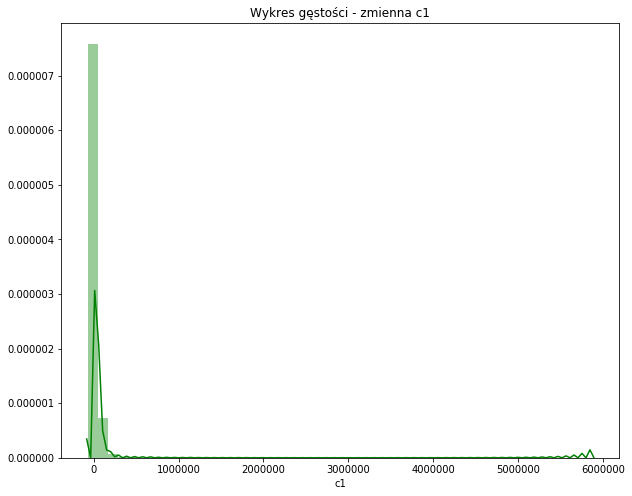

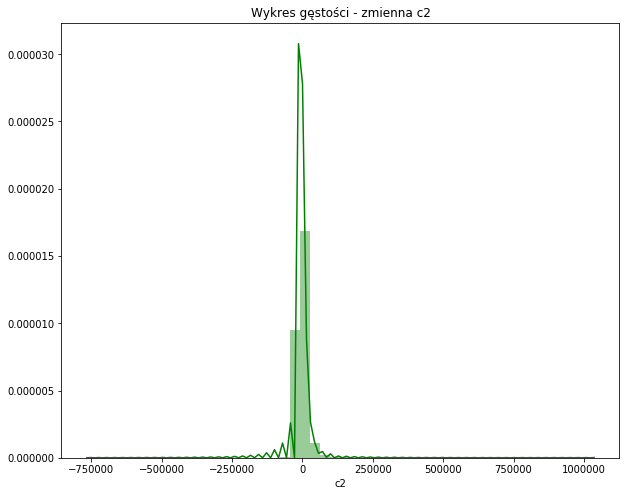

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(data_pca.c1, color = 'green').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
plt.figure(figsize=(10,8))
sns.distplot(data_pca.c2, color = 'green').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

In [57]:
#usuwam wartości ujemne- zwiększam wartość poszczególnych zmiennych o wartość bezwzględną z najmniejszej wartości 
#występującą w danej zmiennej. By uniknąć zer, dodaję jeszcze 1
for col in data_pca:
    if data_pca[col].min() <= 0:
        data_pca[col] = data_pca[col] + np.abs(data_pca[col].min()) + 1

In [58]:
#usuwam skośność zmiennych
data_pca = np.log(data_pca)

In [59]:
#usuwam wartości odstające stosując metodę 1,5 odstępu międzykwartylowego 
q1 = data_pca.quantile(0.25)
q3 = data_pca.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (data_pca[iqr.index] < low_boundary).sum()
num_of_outliers_U = (data_pca[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [60]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,9.508774,12.427150,521,414
c2,13.497873,13.580431,135,2051


In [61]:
# w pętli usuwam wartości nie spełniające poniższego warunku
for row in outliers.iterrows():
    data_pca = data_pca[(data_pca[row[0]] >= row[1]['lower_boundary']) & (data_pca[row[0]] <= row[1]['upper_boundary'])]

In [62]:
#standaryzuje zmienne
scaler = StandardScaler()
scaler.fit(data_pca)
data_pca_std = scaler.transform(data_pca)
data_pca = pd.DataFrame(data=data_pca_std, index=data_pca.index, columns=data_pca.columns)

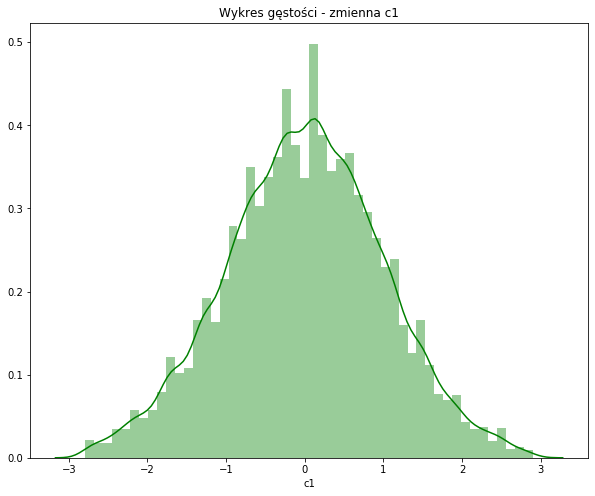

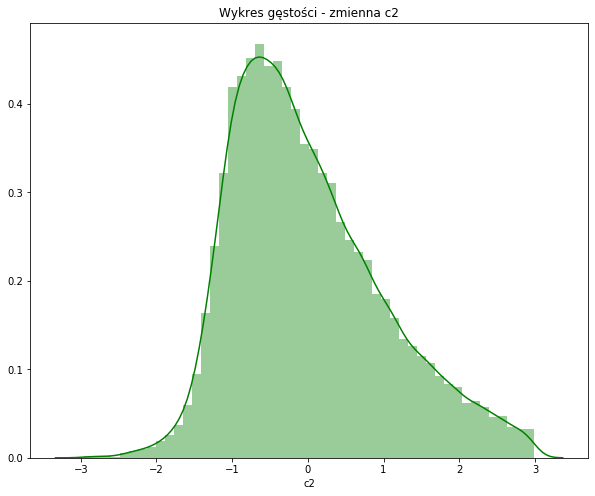

In [63]:
plt.figure(figsize=(10,8))
sns.distplot(data_pca.c1, color = 'green').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
plt.figure(figsize=(10,8))
sns.distplot(data_pca.c2, color = 'green').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

Ograniczę nieco liczebność zbioru. Jedną z wad grupowania hierarchicznego jest dosyć wysoka złożoność obliczeniowa. Ponadto, zbyt dużą liczba obserwacji nieco utrudni obserwację klastrów na wykresie. Pozostawię zatem 1000 obserwacji.

In [71]:
data_pca= data_pca.sample(1000, random_state=42)

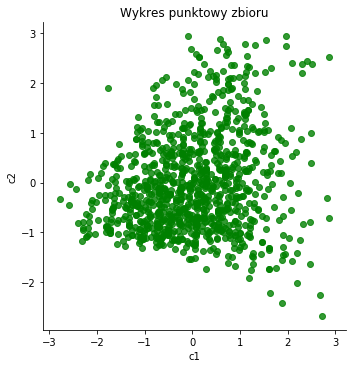

In [72]:
#jak prezentują się wylosowane obserwacje na płaszczyźnie dwuwymiarowej.
sns.lmplot('c1', 'c2', data = data_pca, scatter_kws={"color": "green"}, fit_reg=False).set(title = 'Wykres punktowy zbioru')
plt.show()

A1. wykonam grupowanie hierarchiczne z użciem biblioteki sklearn.
Wykonam grupowanie, w którym miarą odległości będzie odległość euklidesowa, natomiast jako metodę łączenia grup obiorę kryterium Warda. Sklearn daje możliwość wyboru liczby grup. Ustalam zatem ten parametr na 5.

In [73]:
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5).fit(data_pca)

In [74]:
#aby łatwiej zbrazowć model dodaję zmienną do zbioru
data_pca['Cluster_1'] = model_1.labels_

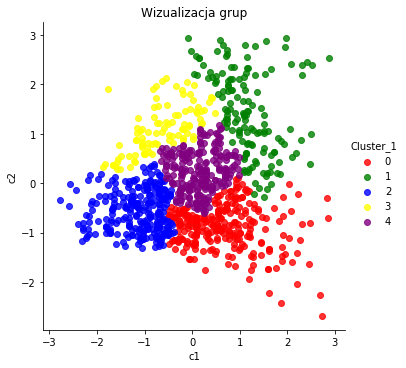

In [75]:
sns.lmplot('c1', 'c2', data = data_pca, hue = 'Cluster_1', fit_reg=False, palette = ['red', 'green', 'blue', 'yellow', 'purple']).set(title='Wizualizacja grup')
plt.show()

A2. Grupowanie z użyciem biblioteki SciPy- używam metody single linkage i complete linkage

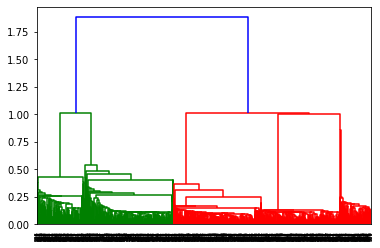

<Figure size 1152x1008 with 0 Axes>

In [76]:
model_2 = linkage(data_pca, method="single", metric='euclidean')
dendrogram(model_2)
fig=plt.figure(figsize=(16,14))
plt.show()

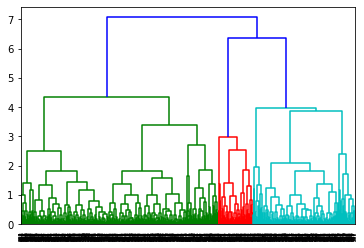

<Figure size 1152x1008 with 0 Axes>

In [77]:
model_3 = linkage(data_pca, method="complete", metric='euclidean')
dendrogram(model_3)
fig=plt.figure(figsize=(16,14))
plt.show()

In [78]:
clusters1= fcluster(model_2, 5, criterion='maxclust')
data_pca['Cluster_2'] = clusters1

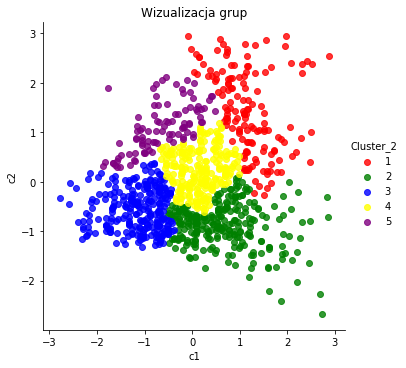

In [94]:
sns.lmplot('c1', 'c2', data = data_pca, hue = 'Cluster_2', fit_reg=False, palette = ['red', 'green', 'blue', 'yellow', 'purple']).set(title='Wizualizacja grup')
plt.show()

In [79]:
clusters2 = fcluster(model_3, 5, criterion='maxclust')
data_pca['Cluster_3'] = clusters2

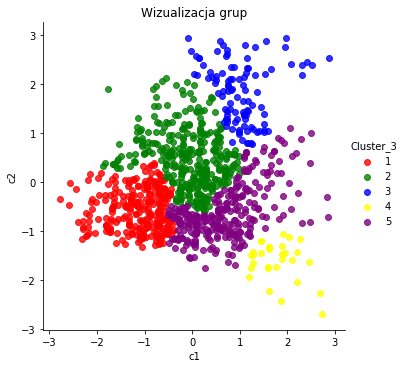

In [80]:
sns.lmplot('c1', 'c2', data = data_pca, hue = 'Cluster_3', fit_reg=False, palette = ['red', 'green', 'blue', 'yellow', 'purple']).set(title='Wizualizacja grup')
plt.show()

Udało mi się otrzymać identyczne wyniki w przypadku tych modeli, co może potwierdzać, że w obu bibliotekach algorytm został zaimplementowany poprawnie.

A3. Klasteryzacja metodą K-means

In [81]:
# wykonam ją na surowych danych bez targetu encode_data1
kmeans = KMeans(n_clusters=5, max_iter=1000) 
kmeans.fit(encode_data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
kmeans.labels_

array([0, 0, 0, ..., 4, 0, 0])

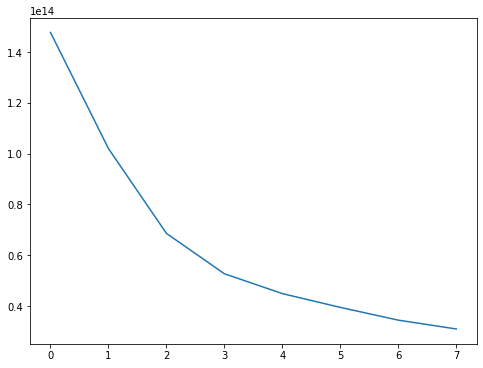

In [83]:
#metody oceny ile klastrów powinniśmy zastosować. 
# metoda łokcia - elbow-curve
ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9] #sprawdzamy dla danej ilosci klastrów
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(encode_data1)
    
    ssd.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(ssd)

In [84]:
# Miara wewnętrzna - wskaźnik sylwetkowy
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(encode_data1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(encode_data1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6423729850382075
For n_clusters=3, the silhouette score is 0.6242346681703643
For n_clusters=4, the silhouette score is 0.5556973343772824
For n_clusters=5, the silhouette score is 0.4496668129641493
For n_clusters=6, the silhouette score is 0.3787507954274196
For n_clusters=7, the silhouette score is 0.3650214574212469
For n_clusters=8, the silhouette score is 0.3157493558359441
For n_clusters=9, the silhouette score is 0.3212559558606181


Przy n=6 wynik zaczyna się stabilizować , dlatego przyjmuję n=6
W metodzie łłokciowej wynik również stabilizuje się przy n=6

In [85]:
kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=42)
kmeans.fit(encode_data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [87]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [88]:
encode_data1['K-Means_Cluster_ID'] = kmeans.labels_

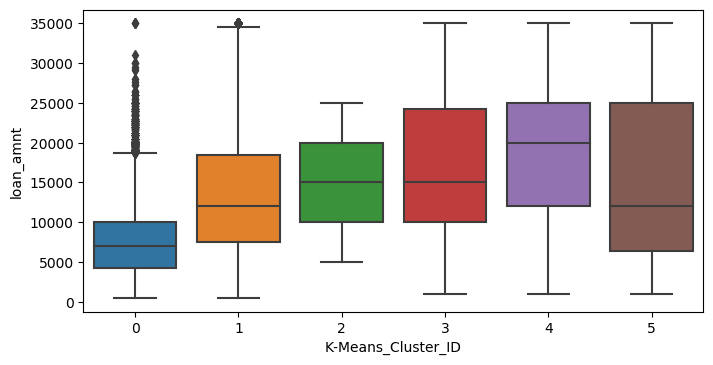

In [93]:
plt.figure(figsize=(8,4),dpi=100)  
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=encode_data1)

Pożyczkobiorcy z najniższą pożyczką są w klastrze 0, najwyższe zawierają się w 1, 3, 4, 5

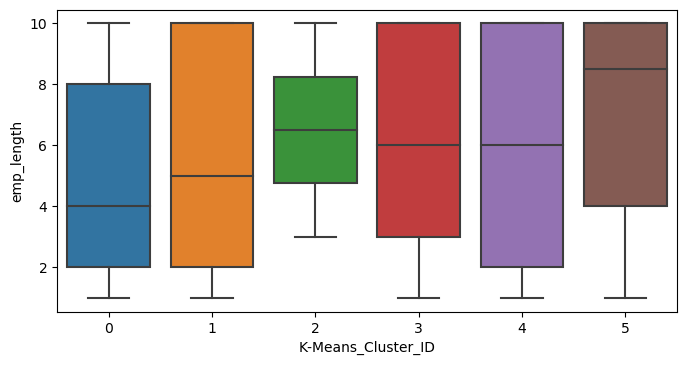

In [94]:
plt.figure(figsize=(8,4),dpi=100)  
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=encode_data1)

Jedynie w klastrze 2 jest grupa pożyczkobiorców ze stażem pracy od 3 lat. W reszcie klastrów są osoby z każdego przedziału.

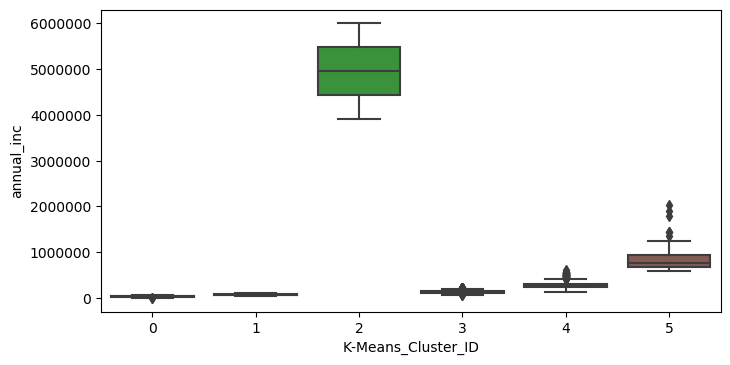

In [95]:
plt.figure(figsize=(8,4),dpi=100)  
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=encode_data1)

Osoby z najwyższym dochodem rocznym są w klastrze 2, osoby z dosyć wysokim, dochodem są w klastrze 5

### B. Dobór modelu

In [96]:
#podział na dane treningowe i testowe
X=encode_data.drop(['loan_status'], axis=1)
Y=encode_data['loan_status']
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [97]:
#skalowanie
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_test

array([[-0.08169792, -0.04763809,  0.0456609 , ..., -0.04441679,
         1.07029124, -1.07029124],
       [ 1.06370471,  1.13899554,  1.08456823, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [ 0.38993846,  0.44097576,  0.52815823, ..., -0.04441679,
        -0.93432513,  0.93432513],
       ...,
       [-0.8228408 , -0.81545984, -0.72353773, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [ 0.12043196,  0.16176785,  0.25544235, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [-1.29447717, -1.30407369, -1.22351685, ..., -0.04441679,
        -0.93432513,  0.93432513]])

###### B1. Decision tree

In [98]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)

In [99]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 4),
                      'accuracy':round(accuracy, 4)}
    return performance_data

In [101]:
dt_prediction = dtree.predict(X_test)

In [102]:
print(classification_report(y_test,dt_prediction))
print(confusion_matrix(y_test, dt_prediction))
dtree_pr= evaluate(dt_prediction,y_test) 
dtree_pr 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1229
           1       1.00      1.00      1.00      7278

    accuracy                           0.99      8507
   macro avg       0.99      0.98      0.99      8507
weighted avg       0.99      0.99      0.99      8507

[[1193   36]
 [  10 7268]]


{'f1-score': 0.9968, 'accuracy': 0.9946}

max_depth=35 (fi:0.99, accuracy:0.99)
max_depth=10 (f1:1.0, accuracy:0.99)
max_depth=7 (fi:0.99, accuracy:0.99)
im niżej tym gorzej, dobre parametry były przy głębokości 12,11. Finalnie zostawiam 10

In [103]:
auroc_dtree=roc_auc_score(dt_prediction, y_test)
print('AUROC=', auroc_dtree)

AUROC= 0.9933793209564625


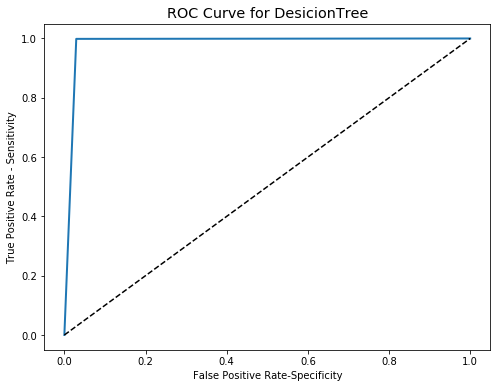

In [104]:
fpr, tpr, thresholds=roc_curve(y_test, dt_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title ('ROC Curve for DesicionTree')
plt.xlabel('False Positive Rate-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.show()

[Text(97.0420871559633, 207.55636363636364, 'X[21] <= -0.087\ngini = 0.259\nsamples = 34028\nvalue = [5202, 28826]'),
 Text(93.97052752293578, 187.7890909090909, 'X[18] <= -1.217\ngini = 0.105\nsamples = 30526\nvalue = [1700, 28826]'),
 Text(53.560321100917434, 168.0218181818182, 'X[1] <= -1.386\ngini = 0.075\nsamples = 438\nvalue = [421, 17]'),
 Text(50.48876146788991, 148.25454545454545, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(56.63188073394495, 148.25454545454545, 'gini = 0.0\nsamples = 421\nvalue = [421, 0]'),
 Text(134.38073394495413, 168.0218181818182, 'X[18] <= -0.937\ngini = 0.081\nsamples = 30088\nvalue = [1279, 28809]'),
 Text(62.775, 148.25454545454545, 'X[1] <= -1.096\ngini = 0.342\nsamples = 2737\nvalue = [600, 2137]'),
 Text(59.70344036697248, 128.48727272727274, 'X[23] <= -1.075\ngini = 0.031\nsamples = 2171\nvalue = [34, 2137]'),
 Text(42.617889908256885, 108.72, 'X[2] <= -1.075\ngini = 0.172\nsamples = 158\nvalue = [15, 143]'),
 Text(33.019266055045875, 88.

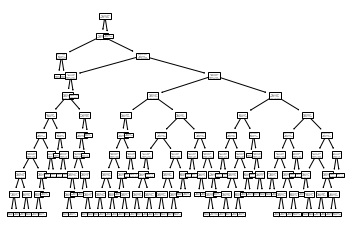

In [105]:
tree.plot_tree(dtree)

##### B2. Random Forest

In [106]:
rf = RandomForestClassifier(n_estimators=100, random_state=0) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
rf_prediction = rf.predict(X_test)

In [108]:
print(classification_report(y_test,rf_prediction))
print(confusion_matrix(y_test, rf_prediction))
rf_pr = evaluate(rf_prediction,y_test) 
print(rf_pr)

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1229
           1       0.98      1.00      0.99      7278

    accuracy                           0.98      8507
   macro avg       0.99      0.95      0.97      8507
weighted avg       0.99      0.98      0.98      8507

[[1100  129]
 [   0 7278]]
{'f1-score': 0.9912, 'accuracy': 0.9848}


In [109]:
auroc_rf=roc_auc_score(rf_prediction, y_test)
print('AUROC=', auroc_rf)

AUROC= 0.9912920210611584


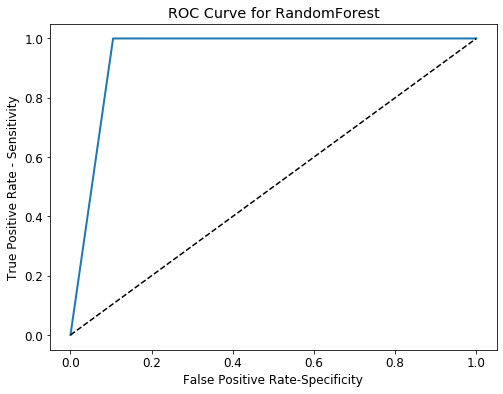

In [110]:
fpr, tpr, thresholds=roc_curve(y_test, rf_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title ('ROC Curve for RandomForest')
plt.xlabel('False Positive Rate-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.show()

##### B3.Support Vector Machine

In [111]:
svm_model = SVC(C=1.0, kernel='linear', random_state=0)
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [112]:
svm_prediction = svm_model.predict(X_test) 

In [113]:
print(classification_report(y_test,svm_prediction))
print(confusion_matrix(y_test, svm_prediction))
svm_pr = evaluate(svm_prediction,y_test) 
print(svm_pr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1229
           1       1.00      1.00      1.00      7278

    accuracy                           1.00      8507
   macro avg       1.00      0.99      0.99      8507
weighted avg       1.00      1.00      1.00      8507

[[1199   30]
 [   0 7278]]
{'f1-score': 0.9979, 'accuracy': 0.9965}


In [114]:
auroc_svm=roc_auc_score(svm_prediction, y_test)
print('AUROC=', auroc_svm)

AUROC= 0.9979474548440066


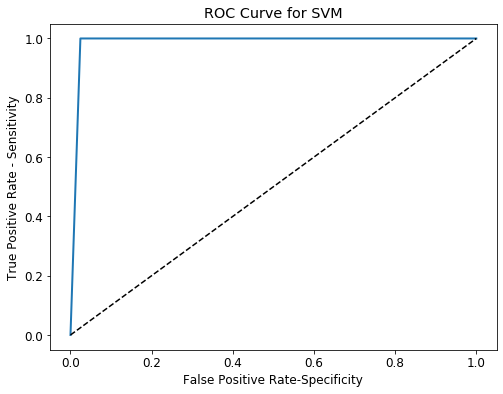

In [115]:
fpr, tpr, thresholds=roc_curve(y_test, svm_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title ('ROC Curve for SVM')
plt.xlabel('False Positive Rate-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.show()

##### B4. Bagging Classifier

In [116]:
gbc= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
gbc.fit(X_train, y_train)
gbc_prediction=gbc.predict(X_test)

In [117]:
print(classification_report(y_test,gbc_prediction))
print(confusion_matrix(y_test, gbc_prediction))
gbc_pr = evaluate(gbc_prediction,y_test) 
print(gbc_pr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1229
           1       0.99      1.00      1.00      7278

    accuracy                           0.99      8507
   macro avg       1.00      0.98      0.99      8507
weighted avg       0.99      0.99      0.99      8507

[[1189   40]
 [   4 7274]]
{'f1-score': 0.997, 'accuracy': 0.9948}


In [118]:
auroc_gbc=roc_auc_score(gbc_prediction, y_test)
print('AUROC=', auroc_gbc)

AUROC= 0.9955890722496854


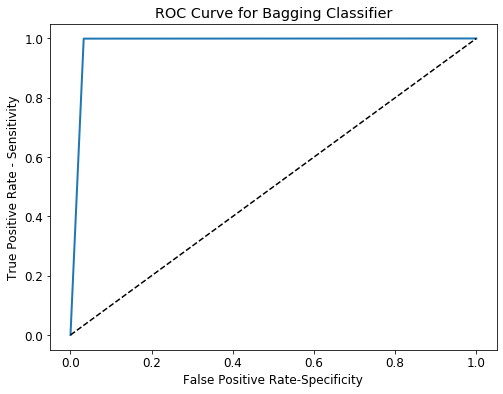

In [119]:
fpr, tpr, thresholds=roc_curve(y_test, gbc_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title ('ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.show()

##### B5. ADABoost

In [ ]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)
ada_prediction=ada.predict(X_test)

In [ ]:
print(classification_report(y_test,ada_prediction))
print(confusion_matrix(y_test, ada_prediction))
ada_pr = evaluate(ada_prediction,y_test) 
print(ada_pr)

In [ ]:
auroc_ada=roc_auc_score(ada_prediction, y_test)
print('AUROC=', auroc_ada)

In [ ]:
fpr, tpr, thresholds=roc_curve(y_test, ada_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title ('ROC Curve for ADABOOST Classifier')
plt.xlabel('False Positive Rate-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.show()

In [ ]:
data_pr=pd.DataFrame({'Model': ['DecisionTree', 'Random Forest', 'SVM',
                               'Bagging Classifier', 'AdaBoost'],
                     'AUROC':[auroc_dtree, auroc_rf, auroc_svm, auroc_gbc, auroc_ada]})
data_pr.sort_values(by='AUROC', ascending=False)

### C. Modelowanie po PCA

In [120]:
#Standaryzacja
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [121]:
#tworzymy DataFrame z wektora X_scaled
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [122]:
pca=PCA(random_state=42)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
pca.explained_variance_ratio_

array([7.82396285e-02, 4.71059119e-02, 2.83543384e-02, 2.50008166e-02,
       2.16393508e-02, 1.95476740e-02, 1.70975804e-02, 1.64782434e-02,
       1.50355093e-02, 1.42662240e-02, 1.33490119e-02, 1.31541981e-02,
       1.28487702e-02, 1.24612913e-02, 1.19197862e-02, 1.18321144e-02,
       1.18253493e-02, 1.17169840e-02, 1.16108604e-02, 1.15203878e-02,
       1.14193904e-02, 1.14067304e-02, 1.13871568e-02, 1.13686985e-02,
       1.13327484e-02, 1.13113344e-02, 1.12762789e-02, 1.12474424e-02,
       1.12240853e-02, 1.12194066e-02, 1.12085388e-02, 1.11948776e-02,
       1.11800489e-02, 1.11657674e-02, 1.11459091e-02, 1.11435715e-02,
       1.11311320e-02, 1.11104522e-02, 1.11068324e-02, 1.10913602e-02,
       1.10859627e-02, 1.10839288e-02, 1.10704428e-02, 1.10650710e-02,
       1.10605445e-02, 1.10424873e-02, 1.10387105e-02, 1.10356447e-02,
       1.10354059e-02, 1.10255697e-02, 1.10251216e-02, 1.10117323e-02,
       1.10036812e-02, 1.09989290e-02, 1.09924854e-02, 1.09903236e-02,
      

In [124]:
#Skumulowana suma wariancji- pozbywamy się szumu z danych
var_cumu=np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.07823963, 0.12534554, 0.15369988, 0.1787007 , 0.20034005,
       0.21988772, 0.2369853 , 0.25346354, 0.26849905, 0.28276528,
       0.29611429, 0.30926849, 0.32211726, 0.33457855, 0.34649833,
       0.35833045, 0.3701558 , 0.38187278, 0.39348364, 0.40500403,
       0.41642342, 0.42783015, 0.43921731, 0.45058601, 0.46191876,
       0.47323009, 0.48450637, 0.49575381, 0.5069779 , 0.5181973 ,
       0.52940584, 0.54060072, 0.55178077, 0.56294654, 0.57409244,
       0.58523602, 0.59636715, 0.6074776 , 0.61858443, 0.62967579,
       0.64076176, 0.65184568, 0.66291613, 0.6739812 , 0.68504174,
       0.69608423, 0.70712294, 0.71815859, 0.72919399, 0.74021956,
       0.75124468, 0.76225641, 0.7732601 , 0.78425902, 0.79525151,
       0.80624183, 0.81722443, 0.82819387, 0.83913433, 0.85003628,
       0.86087919, 0.87167512, 0.88233997, 0.89276533, 0.90299072,
       0.91286371, 0.92250878, 0.93170662, 0.94080086, 0.94943158,
       0.95723336, 0.9645849 , 0.97097952, 0.9768706 , 0.98231

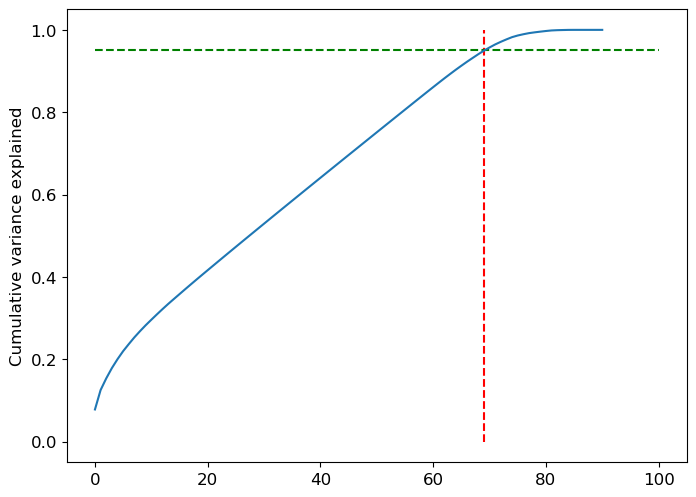

In [125]:
fig = plt.figure(figsize=[8,6],dpi=100)
plt.vlines(x=69, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Najlepsza ilość komponentów to 69 :)

In [126]:
# po dobraniu liczby komponentów robię finalny model
pca_final = IncrementalPCA(n_components=69)
X_pca_final = pca_final.fit_transform(X_scaled)

In [127]:
X=X_pca_final
Y=encode_data['loan_status']
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [128]:
#skalowanie
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_test

array([[ 0.80298481, -0.91956832,  0.2266592 , ...,  0.98556598,
        -0.02353172, -0.12342442],
       [ 0.78840328,  0.91745185,  0.69126951, ..., -4.31143479,
        -0.17918785,  2.50010671],
       [ 0.25862482,  0.72357825,  0.93167658, ...,  0.63502205,
        -0.00722986, -0.05553076],
       ...,
       [-0.87565752, -0.97009876,  1.03350603, ...,  0.67943735,
         0.19521701, -0.94731556],
       [-0.375646  ,  1.34727035,  0.91953616, ..., -0.7772971 ,
         0.15722484,  0.04536279],
       [-0.45139166,  0.39029511, -3.05530019, ..., -0.22219749,
         0.17620937, -1.5992851 ]])

##### C1. DecicionTree

In [129]:
dtree_pca = DecisionTreeClassifier(max_depth=10, random_state=0)

In [130]:
dtree_pca.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [131]:
dt_prediction_pca = dtree_pca.predict(X_test)

In [132]:
print(classification_report(y_test,dt_prediction_pca))
print(confusion_matrix(y_test, dt_prediction_pca))
dtree_pr_pca= evaluate(dt_prediction_pca,y_test) 
dtree_pr_pca

              precision    recall  f1-score   support

           0       0.52      0.42      0.46      1229
           1       0.90      0.94      0.92      7278

    accuracy                           0.86      8507
   macro avg       0.71      0.68      0.69      8507
weighted avg       0.85      0.86      0.85      8507

[[ 513  716]
 [ 466 6812]]


{'f1-score': 0.9202, 'accuracy': 0.8611}

In [135]:
auroc_dtree_pca=roc_auc_score(dt_prediction_pca, y_test)
print('AUROC=', auroc_dtree_pca)

AUROC= 0.7144462511899735


##### C2. Random Forest

In [134]:
rf_pca = RandomForestClassifier(n_estimators=100, random_state=0) 
rf_pca.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
rf_prediction_pca = rf_pca.predict(X_test)

In [137]:
print(classification_report(y_test,rf_prediction_pca))
print(confusion_matrix(y_test, rf_prediction_pca))
rf_pr_pca = evaluate(rf_prediction_pca,y_test) 
print(rf_pr_pca)

              precision    recall  f1-score   support

           0       0.76      0.34      0.47      1229
           1       0.90      0.98      0.94      7278

    accuracy                           0.89      8507
   macro avg       0.83      0.66      0.70      8507
weighted avg       0.88      0.89      0.87      8507

[[ 412  817]
 [ 128 7150]]
{'f1-score': 0.938, 'accuracy': 0.8889}


In [138]:
auroc_rf_pca=roc_auc_score(rf_prediction_pca, y_test)
print('AUROC=', auroc_rf_pca)

AUROC= 0.8302074762097356


##### C3. SVM

In [139]:
svm_model_pca = SVC(C=1.0, kernel='linear', random_state=0)
svm_model_pca.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [140]:
svm_prediction_pca = svm_model_pca.predict(X_test) 

In [141]:
print(classification_report(y_test,svm_prediction_pca))
print(confusion_matrix(y_test, svm_prediction_pca))
svm_pr_pca = evaluate(svm_prediction_pca,y_test) 
print(svm_pr_pca)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1229
           1       0.97      1.00      0.98      7278

    accuracy                           0.97      8507
   macro avg       0.98      0.91      0.94      8507
weighted avg       0.97      0.97      0.97      8507

[[1016  213]
 [  21 7257]]
{'f1-score': 0.9841, 'accuracy': 0.9725}


In [142]:
auroc_svm_pca=roc_auc_score(svm_prediction_pca, y_test)
print('AUROC=', auroc_svm_pca)

AUROC= 0.9756176102674924


##### C4. Bagging Classifier

In [143]:
gbc_pca= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
gbc_pca.fit(X_train, y_train)
gbc_prediction_pca=gbc_pca.predict(X_test)

In [144]:
print(classification_report(y_test,gbc_prediction_pca))
print(confusion_matrix(y_test, gbc_prediction_pca))
gbc_pr_pca = evaluate(gbc_prediction_pca,y_test) 
print(gbc_pr_pca)

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1229
           1       0.91      0.94      0.93      7278

    accuracy                           0.87      8507
   macro avg       0.74      0.71      0.72      8507
weighted avg       0.86      0.87      0.87      8507

[[ 591  638]
 [ 456 6822]]
{'f1-score': 0.9258, 'accuracy': 0.8714}


In [145]:
auroc_gbc_pca=roc_auc_score(gbc_prediction_pca, y_test)
print('AUROC=', auroc_gbc_pca)

AUROC= 0.7394735629181806


##### C5. ADABoost

In [ ]:
ada_pca = AdaBoostClassifier(random_state=1)
ada_pca.fit(X_train, y_train)
ada_prediction_pca=ada_pca.predict(X_test)

In [ ]:
print(classification_report(y_test,ada_prediction_pca))
print(confusion_matrix(y_test, ada_prediction_pca))
ada_pr_pca = evaluate(ada_prediction_pca,y_test) 
print(ada_pr_pca)

In [ ]:
auroc_ada_pca=roc_auc_score(ada_prediction_pca, y_test)
print('AUROC=', auroc_ada_pca)

In [ ]:
data_pr=pd.DataFrame({'Model after PCA': ['DecisionTree', 'Random Forest', 'SVM',
                               'Bagging Classifier', 'AdaBoost'],
                     'AUROC':[auroc_dtree_pca, auroc_rf_pca, auroc_svm_pca, auroc_gbc_pca, auroc_ada_pca]})
data_pr.sort_values(by='AUROC', ascending=False)

### D. Finalny Model.

Po wykonaniu PCA z ilością komponentów n=69, wyniki AUROC były niższe niż podczas modelowania bez PCA. 
Najlepszy wynik AUROC ma model SVM na poziomie 99,79 %, dlatego ten model jest moim ostatecznym.
WYkonam jeszcze crosvalidację. 

In [160]:
#jeszcze raz dziele dane na testowe i treningowe
Xf=encode_data.drop(['loan_status'], axis=1)
Yf=encode_data['loan_status']
Xf_train, Xf_test, yf_train, yf_test=train_test_split(Xf, Yf, test_size=0.2, random_state=42)

In [161]:
#skalowanie
sc=StandardScaler()
Xf_train=sc.fit_transform(Xf_train)
Xf_test=sc.transform(Xf_test)
Xf_test

array([[-0.08169792, -0.04763809,  0.0456609 , ..., -0.04441679,
         1.07029124, -1.07029124],
       [ 1.06370471,  1.13899554,  1.08456823, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [ 0.38993846,  0.44097576,  0.52815823, ..., -0.04441679,
        -0.93432513,  0.93432513],
       ...,
       [-0.8228408 , -0.81545984, -0.72353773, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [ 0.12043196,  0.16176785,  0.25544235, ..., -0.04441679,
        -0.93432513,  0.93432513],
       [-1.29447717, -1.30407369, -1.22351685, ..., -0.04441679,
        -0.93432513,  0.93432513]])

In [163]:
svm_final = SVC(C=1.0, kernel='linear', random_state=0)
svm_final.fit(Xf_train,yf_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [167]:
svm_prediction_F = svm_final.predict(Xf_test) 
print(classification_report(yf_test,svm_prediction_F))
print(confusion_matrix(yf_test, svm_prediction_F))
svm_pr_F = evaluate(svm_prediction_F,yf_test) 
print(svm_pr_F)
print('Performance on training data using DT:',svm_final.score(Xf_train,yf_train))
print('Performance on testing data using DT:',svm_final.score(Xf_test,yf_test))
acc_SVM=metrics.r2_score(yf_test, svm_prediction_F )
print('Accuracy DT: ',acc_SVM)
print('MSE: ',metrics.mean_squared_error(yf_test, svm_prediction_F ))
auroc_svm_F=roc_auc_score(svm_prediction_F, yf_test)
print('AUROC=', auroc_svm_F)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1229
           1       1.00      1.00      1.00      7278

    accuracy                           1.00      8507
   macro avg       1.00      0.99      0.99      8507
weighted avg       1.00      1.00      1.00      8507

[[1199   30]
 [   0 7278]]
{'f1-score': 0.9979, 'accuracy': 0.9965}
Performance on training data using DT: 0.9967085929234748
Performance on testing data using DT: 0.9964734924180086
Accuracy DT:  0.9714678989547062
MSE:  0.0035265075819913014
AUROC= 0.9979474548440066


In [169]:
## żródło: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, Xf, yf, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, Xf, yf, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [170]:
# Shuffle for learning curves
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

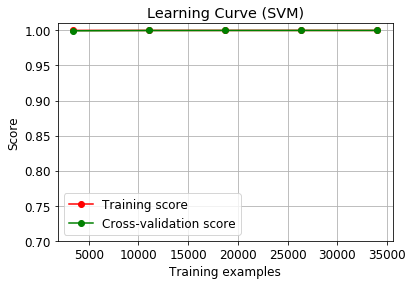

In [171]:
from sklearn.model_selection import learning_curve
model_svm= SVC(kernel='linear', gamma=0.001, C=1.0)
plot_learning_curve(model_svm, 'Learning Curve (SVM)', Xf, Yf, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

z racji, że bardzo długo wczytuje się wykres, wrzucam jego print screena. Widać, że linie są praktycznie zbieżne, nie ma różnic pomiędzy modelem a modelem po krosswalidacji. Linie są tak ułożone, że nie ma mowy o overfittingu. 
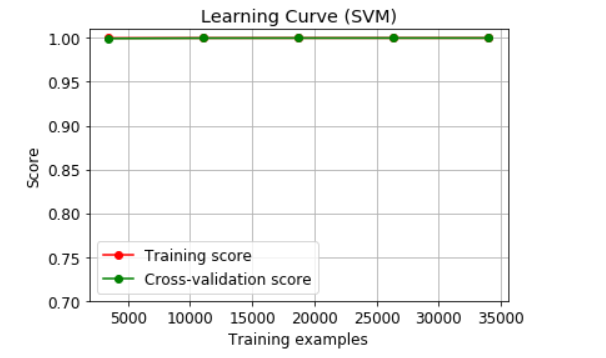

In [172]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(svm_final,Xf, Yf, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9999764893967179
Standard Deviation:  9.693670065402136e-05


Zapisywanie modelu na dysku

In [173]:
import pickle
svm_final='final_model_Beata.sav'
pickle.dump(model_svm, open(svm_final, 'wb'))